# 0 基于python语言的网络分析实践


##  0.1 本文档创作目的

创作本文档的主要目的是为研究生和本科提供一本使用python语言，基于networkX，igraph，SNAP和graphlab进行社交网络分析的讲义，使学生能通过自学的方式掌握这些工具的使用方法。

##  0.2 本文档内容简介

本文档有以下章节：

- 第一章 基于networkX进行网络图的绘制
- 第二章 网络的读入、创建和保存
- 第三章 不同的网络类型（应该能和第二章合在一起）
- 第四章 无向无权网络的统计分析
- 第五章 社交网络社团发现专题
- 第六章 社交网络中链路预测专题
- 第七章 社交网络中信息传播专题
- 第八章 有向无权网络的统计分析
- 第九章 加权网络的统计分析

暂时这几章都放在这个文档中，慢慢应该每一章为一个ipynb文件。

## 0.3 进行环境的初始化

In [1]:
import networkx as nx                 #导入networkx网络分析模块，缩写为nx

In [2]:
#%pylab命令将载入pylab，并且将这两个模块中的名字载入到全局名字空间中。
#缺省参数时，它使用matplotlib的缺省界面库显示图表，如果带inline参数则将图表作为图像插入到Notebook中。
#使用界面库显示图像时可以使用交互工具，而将图表直接插入到Notebook中则有利于编写文档。
%pylab inline                         

Populating the interactive namespace from numpy and matplotlib


# 1. 绘制网络图

## 1.1 绘制一个网络: 使用nx.draw()方法

/Users/liding/anaconda/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


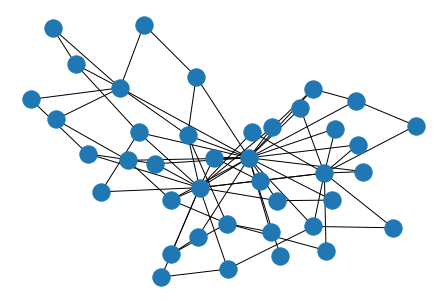

In [3]:
G =nx.random_graphs.barabasi_albert_graph(40,2)      #生成一个BA无标度网络G
nx.draw(G)                                           #绘制网络G

In [4]:
plt.savefig("ba.png")                                #输出方式1: 将图像存为一个png格式的图片文件

<Figure size 432x288 with 0 Axes>

## 1.2 样式及参数
NetworkX提供了一系列样式参数，可以用来修饰和美化图形，达到我们想要的效果。常用的参数包括：

- `node_size`:  指定节点的尺寸大小(默认是300，单位未知，就是上图中那么大的点)
- `node_color`:  指定节点的颜色 (默认是红色，可以用字符串简单标识颜色，例如'r'为红色，'b'为绿色等，具体可查看手册)
- `node_shape`:  节点的形状（默认是圆形，用字符串'o'标识，具体可查看手册）
- `alpha`: 透明度 (默认是1.0，不透明，0为完全透明)
- `width`: 边的宽度 (默认为1.0)
- `edge_color`: 边的颜色(默认为黑色)
- `style`: 边的样式(默认为实现，可选： solid|dashed|dotted,dashdot)
- `with_labels`: 节点是否带标签（默认为True）
- `font_size`: 节点标签字体大小 (默认为12)
- `font_color`: 节点标签字体颜色（默认为黑色）

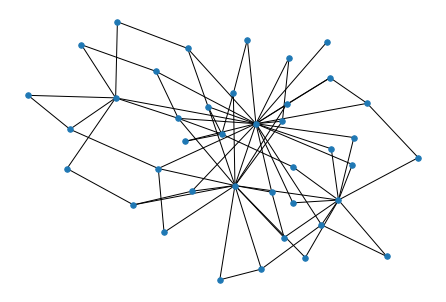

In [5]:
#node_size:  指定节点的尺寸大小(默认是300) 
nx.draw(G,node_size = 30)                            

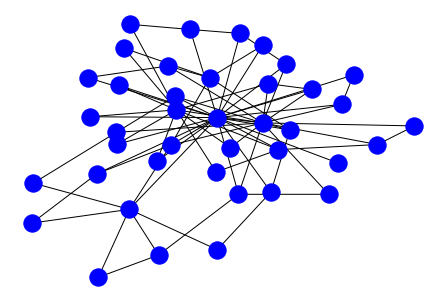

In [6]:
#node_color:  指定节点的颜色 (默认是红色，可以用字符串简单标识颜色，例如'r'为红色，'b'为绿色等)
nx.draw(G, node_color = 'b')                       

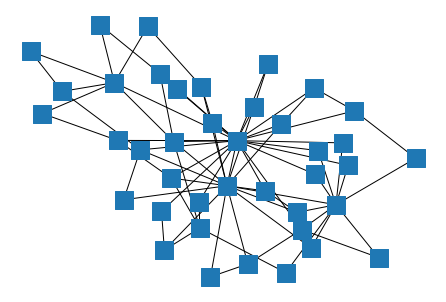

In [7]:
#node_shape:  节点的形状（默认是圆形，用字符串'o'标识）
nx.draw(G, node_shape = 's')

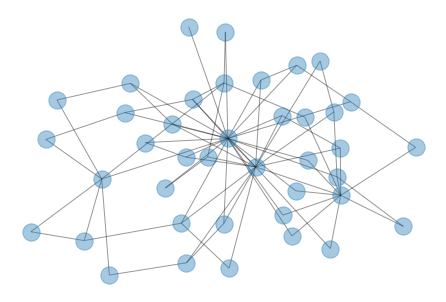

In [8]:
#alpha: 透明度 (默认是1.0，不透明) 
nx.draw(G, alpha = 0.4)

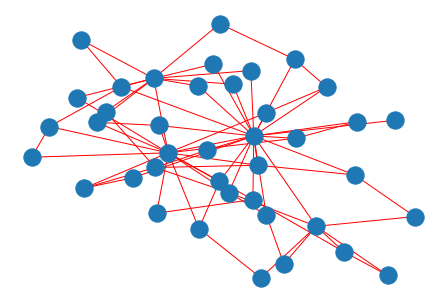

In [9]:
#edge_color: 边的颜色(默认为黑色)
nx.draw(G, edge_color ='r')

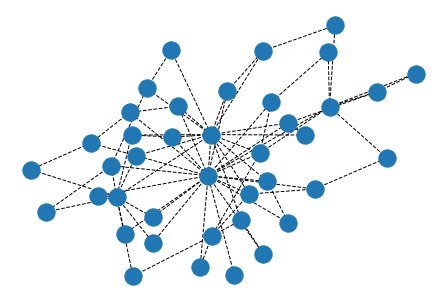

In [10]:
#style: 边的样式(默认为实线，可选： solid|dashed|dotted,dashdot)
nx.draw(G, style = 'dashed')

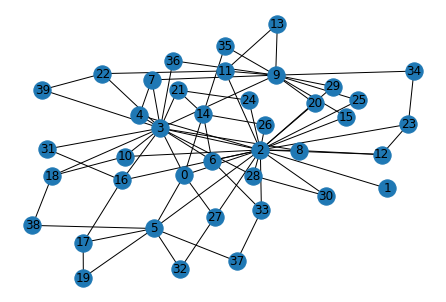

In [11]:
#with_labels: 节点是否带标签（默认为False）
nx.draw(G, with_labels=True)

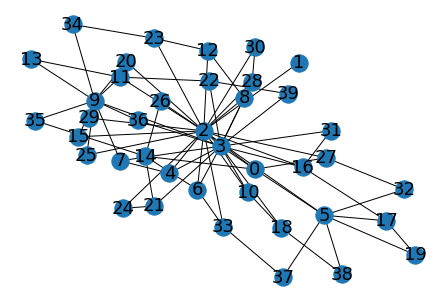

In [12]:
#font_size: 节点标签字体大小 (默认为12)
nx.draw(G, with_labels=True, font_size=18)

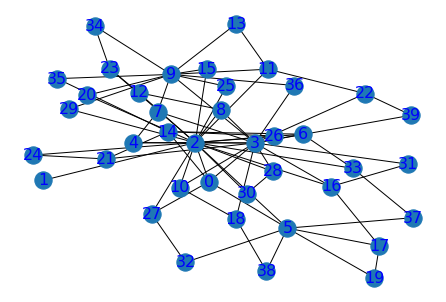

In [13]:
#font_color: 节点标签字体颜色（默认为黑色）
nx.draw(G, with_labels=True, font_size=16, font_color='b')

## 1.3 节点布局
节点布局指定节点排列的形式

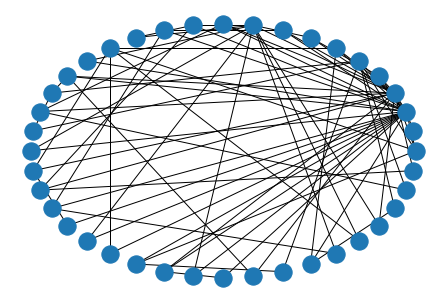

In [14]:
pos = nx.circular_layout(G)                  #circular_layout：节点在一个圆环上均匀分布         
nx.draw(G,pos)

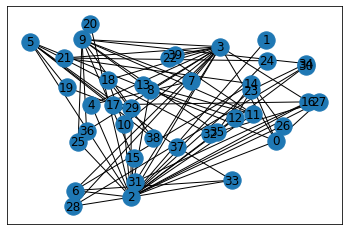

In [15]:
pos = nx.random_layout(G)       #random_layout：节点随机分布    
nx.draw_networkx(G,pos)

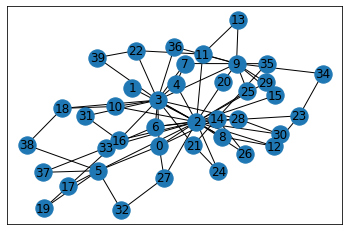

In [16]:
pos = nx.spring_layout(G)   #spring_layout： 用Fruchterman-Reingold算法排列节点，默认布局方式      
nx.draw_networkx(G,pos)

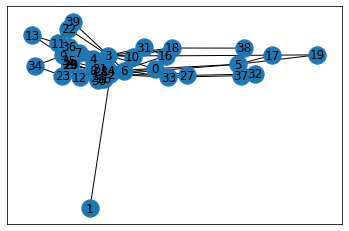

In [17]:
pos = nx.spectral_layout(G)      #spectral_layout：根据图的拉普拉斯特征向量排列节点    
nx.draw_networkx(G,pos)

# 2. 读网络和保存网络

## 2.1 读取网络数据

In [18]:
# 连边对数据可以直接读取来生成网络
G = nx.read_gml('karate.gml' , label='id')
#G = nx.read_edgelist("karate.gml")
#G = nx.karate_club_graph()
G = G.to_undirected()                

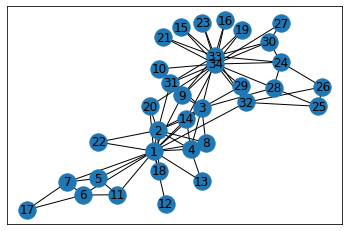

In [19]:
#对生成的网络数据进行可视化
pos=nx.spring_layout(G)
nx.draw_networkx(G,pos,with_labels=True)

## 2.2 保存网络数据

In [20]:
nx.write_edgelist(G, "karate.txt",delimiter=",")

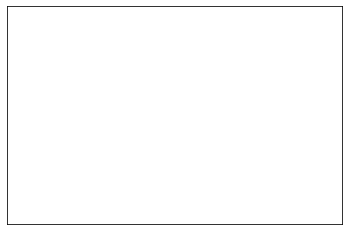

In [21]:
G1 = nx.read_edgelist("karate.txt")
G1 = G1.to_undirected()  

pos=nx.spring_layout(G1)
nx.draw_networkx(G1,pos,with_labels=True)

# 3. 网络的不同类型

## 3.1 无向无权网络

In [22]:
G = nx.Graph()                                  #建立一个空的无向图G
G.add_node(1)                                   #添加一个节点1
G.add_edge(2,3)                                 #添加一条边2-3（隐含着添加了两个节点2、3）
G.add_edge(3,2)                                 #对于无向图，边3-2与边2-3被认为是一条边
G.add_edges_from([(1,2),(1,3)])                 #添加两条边1-2以及1-3
print ("nodes:", G.nodes() )                      #输出全部的节点： [1, 2, 3]
print ("edges:", G.edges() )                      #输出全部的边：  [(2, 3)]
print ("number of edges:", G.number_of_edges())   #输出边的数量：   1

nodes: [1, 2, 3]
edges: [(1, 2), (1, 3), (2, 3)]
number of edges: 3


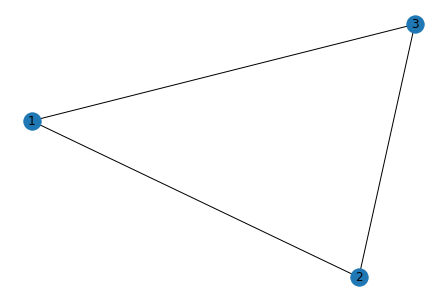

In [23]:
nx.draw(G,with_labels=True)
plt.savefig("undirected_network.png")

## 3.2 有向无权网络

In [24]:
G = nx.DiGraph()                                   #建立一个空的有向图G
G.add_node(1)                                      #添加一个节点1
G.add_node(2)                                      #添加一个节点2
G.add_nodes_from([3,4,5,6])                        #加点集合3,4,5,6
G.add_cycle([1,2,3,4])                             #加环
G.add_edge(1,3)                                    #加边1-3
G.add_edges_from([(3,5),(3,6),(6,7)])              #加边集合，3-5,3-6,6-7

print ("nodes:", G.nodes() )                         #输出全部的节点
print ("edges:", G.edges()  )                        #输出全部的边
print( "number of edges:", G.number_of_edges()  )    #输出边的数量

nodes: [1, 2, 3, 4, 5, 6, 7]
edges: [(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (3, 6), (4, 1), (6, 7)]
number of edges: 8


/Users/liding/anaconda/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


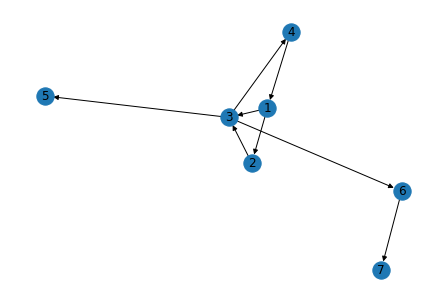

In [25]:
nx.draw(G,with_labels=True)                         #绘图
plt.savefig("directed_network.png")

## 3.3 无向加权网络

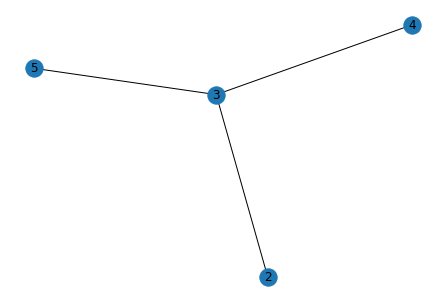

In [26]:
G = nx.Graph()                                        #建立一个空的无向图G
G.add_edge(2,3)                                       #添加一条边2-3（隐含着添加了两个节点2、3）
G.add_weighted_edges_from([(3, 4, 3.5),(3, 5, 7.0)])  

nx.draw(G,with_labels=True)
plt.savefig("undirected_weighted_network.png")

In [27]:
print (G.get_edge_data(2, 3))                          #读取边2-3的权重属性
print (G.get_edge_data(3, 4) )                         #读取边3-4的权重属性
print (G.get_edge_data(3, 5)  )                        #读取边3-5的权重属性

{}
{'weight': 3.5}
{'weight': 7.0}


In [28]:
G[3][4]['weight']                                    #查看边3-4的权重属性

3.5

In [29]:
G.edges()                                            #查看所有边

EdgeView([(2, 3), (3, 4), (3, 5)])

In [30]:
G.edges(data=True)                                   #查看所有边的属性

EdgeDataView([(2, 3, {}), (3, 4, {'weight': 3.5}), (3, 5, {'weight': 7.0})])

In [31]:
G[3][4]['weight'] = 1                                #更改边3-4的权重属性

## 3.4 有向加权网络

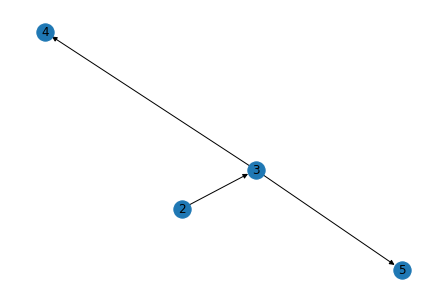

In [32]:
G = nx.Graph()                                        #建立一个空的无向图G
G = G.to_directed()                                   #转化成有向图G
G.add_edge(2,3)                                       #添加一条边2-3（隐含着添加了两个节点2、3）
G.add_weighted_edges_from([(3, 4, 3.5),(3, 5, 7.0)])  #添加两条有向边3-4和3-5，权重分别为3.5和7.0

nx.draw(G,with_labels=True)
plt.savefig("directed_weighted_network.png")

In [33]:
G.edges(data=True)                                     #查看所有边属性

OutEdgeDataView([(2, 3, {}), (3, 4, {'weight': 3.5}), (3, 5, {'weight': 7.0})])

In [34]:
print (G.get_edge_data(2, 3) )                           #读取边2-3的权重属性
print (G.get_edge_data(3, 4) )                        #读取边3-4的权重属性
print( G.get_edge_data(3, 5) )                           #读取边3-5的权重属性

{}
{'weight': 3.5}
{'weight': 7.0}


In [35]:
print( G.get_edge_data(3, 2))                            #读取边3-2的权重属性
print (G.get_edge_data(4, 3))                            #读取边4-3的权重属性
print (G.get_edge_data(5, 3))                          #读取边5-3的权重属性

None
None
None


In [36]:
print ("nodes:", G.nodes())                              #输出全部的节点
print ("edges:", G.edges() )                             #输出全部的边
print ("number of edges:", G.number_of_edges())          #输出边的数量

nodes: [2, 3, 4, 5]
edges: [(2, 3), (3, 4), (3, 5)]
number of edges: 3


## 3.5 有向网络和无向网络可以互相转换
- Graph.to_undirected()：有向网络转换成无向网络
- Graph.to_directed()：无向网络转换成有向网络

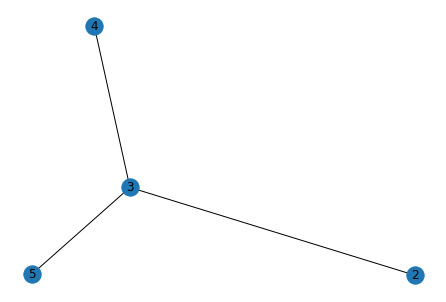

In [37]:
G = G.to_undirected()   
nx.draw(G,with_labels=True)

# 4 无向无权网络的分析

## 4.1 节点的平均度

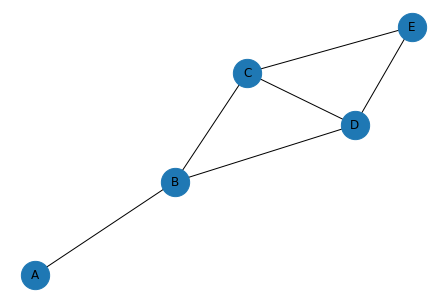

In [38]:
G = nx.Graph() 
G.add_nodes_from(['A','B','C','D','E'])
G.add_edges_from([('A','B'),('B','C'),('B','D'),('C','D'),('C','E'),('D','E')])
nx.draw(G,with_labels=True, node_size = 800)

In [39]:
#计算方式1：2*所有的连边数/所有的节点数
print ('the node number of this network is', G.number_of_nodes())
print ('the edge number of this network is', G.number_of_edges())
print ('the average degree of this network is', 2.0*G.number_of_edges()/G.number_of_nodes())

the node number of this network is 5
the edge number of this network is 6
the average degree of this network is 2.4


In [40]:
G.degree('A')                                              #获得单个节点A的度值

1

In [41]:
G.degree(['A','B'])                                        #获得节点A和节点B的度值

DegreeView({'A': 1, 'B': 3})

In [42]:
G.degree()                                                 #获得图G中所有节点的度值

DegreeView({'A': 1, 'B': 3, 'C': 3, 'D': 3, 'E': 2})

In [43]:
list(G.degree())                                       #以列表形式展现所有节点的度值

[('A', 1), ('B', 3), ('C', 3), ('D', 3), ('E', 2)]

In [44]:
#deg=G.degree()                                      #以列表形式展现所有节点的度值
[d for n, d in G.degree()] 

[1, 3, 3, 3, 2]

In [45]:
#计算方式2：所有节点的度的平均值
print ('the average degree of this network is', mean([d for n, d in G.degree()]))

the average degree of this network is 2.4


## 4.2 网络的密度

### 4.2.1 网络的方阵表示
邻接矩阵是计算机中表示一个网络的常用方式，网络$G$的邻接矩阵$A$是一个$N$阶方阵，$N$为网络规模，即节点数目。  
无权无向图G的邻接矩阵A中：
- $a_{ij}=1$ 表示节点$i$和节点$j$之间有边
- $a_{ij}=0$ 表示节点$i$和节点$j$之间没有边

In [46]:
A_sparse = nx.adjacency_matrix(G)        
print (A_sparse) 

  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (3, 1)	1
  (3, 2)	1
  (3, 4)	1
  (4, 2)	1
  (4, 3)	1


In [47]:
A_dense= A_sparse.todense()       #三元组转化为二维矩阵形式
print (A_dense)
#特点：(1) 对角线上的元素（对角元）取值均为0
#     (2) 矩阵对称，节点i和节点j之间存在连边，那么节点j和节点i之间也存在连边

[[0 1 0 0 0]
 [1 0 1 1 0]
 [0 1 0 1 1]
 [0 1 1 0 1]
 [0 0 1 1 0]]


### 4.2.2 网络密度的计算

In [48]:
#网络的密度=实际边数/最大可能的边数
#设网络的节点数为m，连边数为n，则网络的密度d=2*n/(m*(m-1))
print ('the node number of this network is', G.number_of_nodes())
print ('the edge number of this network is', G.number_of_edges())
print ('the density of this network is', 2.0*G.number_of_edges()/(G.number_of_nodes()*(G.number_of_nodes()-1)))

the node number of this network is 5
the edge number of this network is 6
the density of this network is 0.6


## 4.3 模型网络的生成

### 4.3.1 规则网络的生成

/Users/liding/anaconda/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


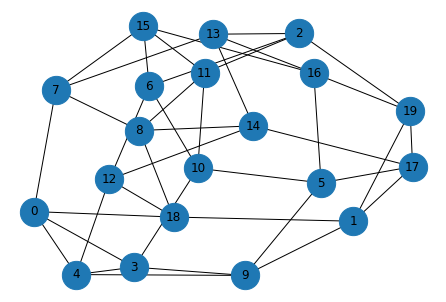

In [49]:
RG = nx.random_graphs.random_regular_graph(4,20)     #生成包含20个节点、每个节点有4个邻居的规则网络
pos = nx.spring_layout(RG) 
nx.draw(RG,pos, with_labels=True, node_size =800)    #绘制规则网络的图形

In [50]:
[d for n, d in RG.degree()]                                    #以列表形式展现所有节点的度值

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

### 4.3.2 ER随机网络的生成

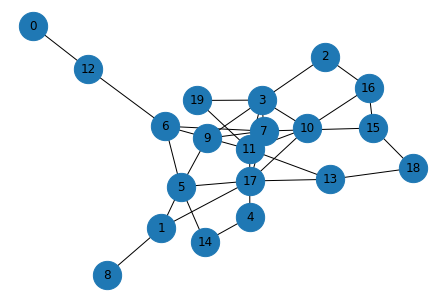

In [51]:
ER = nx.random_graphs.erdos_renyi_graph(20,0.16)             #生成包含20个节点、以概率0.2连接的ER随机网络
pos = nx.spring_layout(ER) 
nx.draw(ER,pos, with_labels=True, node_size =800)           #绘制ER随机网络的图形

In [52]:
[d for n, d in ER.degree()] #以列表形式展现所有节点的度值

[1, 3, 2, 6, 2, 5, 4, 5, 1, 3, 4, 6, 2, 3, 2, 3, 3, 5, 2, 2]

### 4.3.3 SW小世界网络的生成

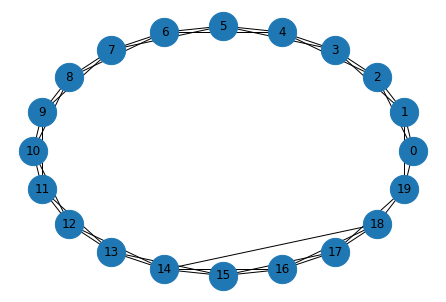

In [53]:
WS = nx.random_graphs.watts_strogatz_graph(20,4,0.3)        #生成包含20个节点、每个节点4个近邻、随机化重连概率为0.3的小世界网络 
pos = nx.circular_layout(WS)                                #定义一个布局，此处采用了circular布局方式
nx.draw(WS,pos, with_labels=True, node_size =800)           #绘制WS小世界网络的图形

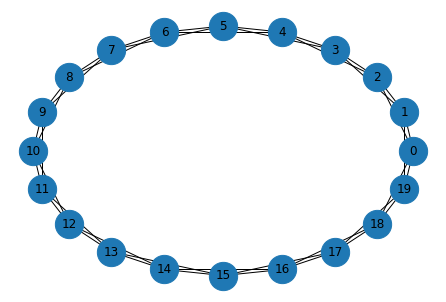

In [54]:
WS = nx.random_graphs.watts_strogatz_graph(20,4,0)          #p=0时，生成规则网络
nx.draw(WS,pos, with_labels=True, node_size =800)          

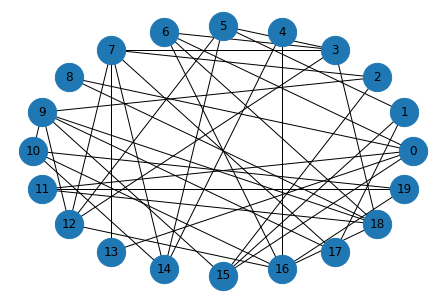

In [55]:
WS = nx.random_graphs.watts_strogatz_graph(20,4,1.0)          #p=1时，生成ER随机网络
nx.draw(WS,pos, with_labels=True, node_size =800)   

### 4.3.4 BA无标度网络的生成

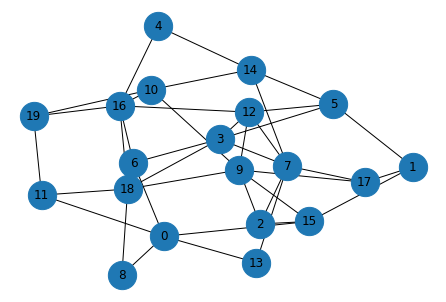

In [56]:
BA = nx.random_graphs.barabasi_albert_graph(20,2)          #生成n=20、m=1的BA无标度网络
pos = nx.spring_layout(WS)                                 #定义一个布局，此处采用了spring布局方式
nx.draw(WS,pos, with_labels=True, node_size =800)          #绘制BA无标度网络的图形

In [57]:
[d for n, d in BA.degree()]                                       #以列表形式展现所有节点的度值

[2, 2, 11, 9, 4, 3, 5, 5, 2, 4, 2, 4, 4, 2, 3, 2, 2, 2, 2, 2]

## 4.4 网络的度分布

- 网络平均度：网络中所有节点度的平均值，反映了网络的疏密程度
- 度分布(Degree Distribution)：网络中随机选取的一个节点的度为k的概率P(k)，通过网络中节点度的分布规律刻画不同节点的重要性。
- 度分布的实际应用：在大规模网络中，度分布通常作为区分不同类型网络的指标，比如ER随机图服从“泊松分布”，在线社交网络等复杂网络服从“幂律分布”。
- 度分布函数P(k)：网络中度为k的节点在整个网络中所占的比例，即度值为k的节点数目与网络总节点数目的比值。

### 4.4.1 ER随机网络的度分布

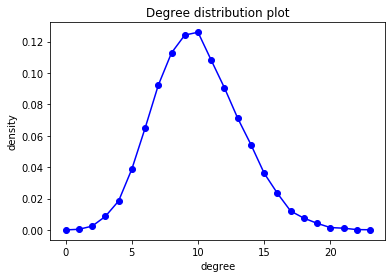

In [58]:
G = nx.random_graphs.erdos_renyi_graph(10000,0.001)   
degree =  nx.degree_histogram(G) 
degree_index = range(len(degree)) 
degree_distribution = [degree_i / float(sum(degree)) for degree_i in degree]     #将频次转换为概率

plot(degree_index,degree_distribution,'b-',marker='o')
title("Degree distribution plot")
ylabel("density")
xlabel("degree")

savefig("ER_degree_histogram.png")

### 4.4.2 BA无标度网络的度分布

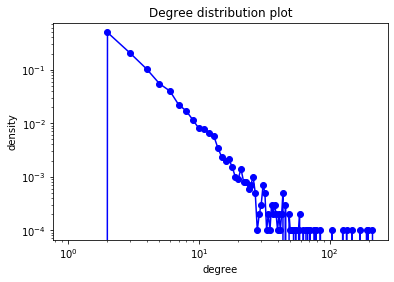

In [59]:
G = nx.random_graphs.barabasi_albert_graph(10000,2)                              #生成n=10000、m=2的BA无标度网络
degree =  nx.degree_histogram(G) 
degree_index = range(len(degree)) 
degree_distribution = [degree_i / float(sum(degree)) for degree_i in degree]     #将频次转换为概率

loglog(degree_index,degree_distribution,'b-',marker='o')
title("Degree distribution plot")
ylabel("density")
xlabel("degree")

savefig("BA_degree_histogram.png")

## 4.5 网络聚类系数
聚类系数(Clustering Coefficient)：网络中与同一节点相连的节点之间也互为邻域节点的程度。  
节点聚类系数数学公式：

对于网络中的节点i，聚类系数Ci定义为与它相邻的节点间也存在连接的平均概率。假设节点i的度为ki，也即节点i所连接的邻居个数；Ei表示ki个邻居之间实际存在的边数；ki个邻居之间可能存在边的数目上限0.5ki(ki-1)。

节点的聚类系数在社交网络中有直观的含义，通俗地讲，聚类系数定量刻画你的任意两个朋友之间也互相为朋友的概率，反映的是你的朋友圈的紧密程度。

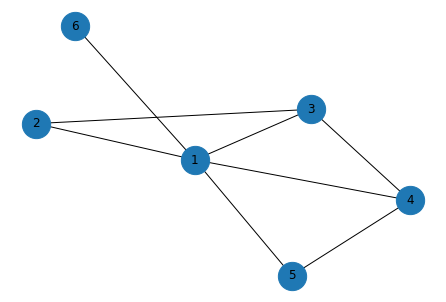

In [60]:
G = nx.Graph()             
G.add_nodes_from([1,2,3,4,5,6])                               
G.add_edges_from([(1,2),(1,3),(1,4),(1,5),(1,6),(2,3),(3,4),(4,5)])                                       
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,node_size = 800)  

In [61]:
#计算网络中每个节点的聚类系数
C_all=nx.clustering(G)
print (C_all)

{1: 0.3, 2: 1.0, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 1.0, 6: 0}


In [62]:
#计算网络平均聚类系数
Average_C=nx.average_clustering(G)
print( Average_C)

0.6055555555555555


## 4.6 网络的度匹配系数
同配性(Assortativity)：
功能：反映的是网络中度相近节点间相互关联的程度。

度相关性：表示一个节点的度与其邻居节点度之间的相关性。

同配：网络中度大(小)的节点倾向于连接度大(小)的节点，则该网络是正相关的；
异配：网络中度大(小)的节点倾向于连接度小(大)的节点，则该网络是负相关的；

同配系数(Pearson Coefficient----皮尔森系数)：
功能：评价网络中一个节点的度与其相邻节点的度之间的关系
计算公式：

式中，ji和ki分别代表第i条边连接的两个节点的度；M表示网络中的总边数。
r取值大于0，网络中互相邻接的节点之间，其度是正相关的，即度大的节点倾向于连接度大的节点，而度小的节点倾向于连接度小的节点，这样的网络具有同配性，对应的相关性系数称为同配系数。

同配系数r取值范围：0<=|r|<=1
- (1) 当r<0时，网络是异配的；
- (2) 当r>0时，网络是同配的；
- (3) 当r=0时，网络是不相关的，即网络中一个节点的度与其邻居节点度之间没有相关性，如随机网络。

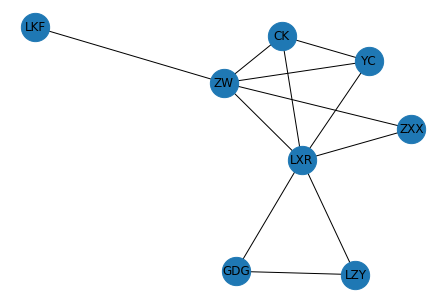

In [63]:
#生成自定义网络G
G = nx.Graph()              
G.add_nodes_from(['CK','YC','ZXX','GDG',
                  'ZW','LXR','LKF','LZY']) 
G.add_edges_from([('LKF','ZW'),('ZW','YC'),
                  ('ZW','CK'),('ZW','ZXX'),
                  ('CK','YC'),('CK','LXR'),
                  ('LXR','YC'),('LXR','ZXX'),
                  ('LXR','LZY'),('LXR','GDG'),
                  ('LZY','GDG'),('ZW','LXR')])
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,node_size = 800)  

In [64]:
#计算网络的匹配系数
r_G=nx.degree_assortativity_coefficient(G)
print (r_G)

-0.4851485148514866


结论：该网络的同配系数r<0，说明该网络为异配网络。  
现实生活中由于个人所处社会阶级的限制，通常只能够跟与自己在同一阶层的人社交，精英人物之间更容易结识，而普通人只能认识与自己相似的人。在线社交网络打破了这一社交阶层的制约，普通人更容易与精英人物建立单向关注关系或相识关系。因此，在社交网络通常具有异配性，或表现出不明显的同配性。

## 4.7 网络中节点的重要性

很多复杂网络呈现出异质的拓扑结构，这说明这些网络中每个节点的重要程度是不同的。在复杂网络的各种基础研究工作中，识别出网络中的一些最重要节点具有非常明显的实用价值。对于各种各样的实证网络，识别出重要节点可以针对性地分析其性质，制定正确的策略和措施。如在恐怖组织关系网络中，如果能定位出组织中的头目和骨干分子，那么就能迅速侦察到恐怖集团的破坏行动；在大规模计算机网络中，可以根据服务器节点的重要程度进行有针对性的备份，这样既能保证网络的鲁棒性，也能有效地节省资源；在传染病传播的社交网络中，如果能尽快找出超级传染者，就可以有针对性地治疗和隔离重点病人，有效防止病毒的传播和扩散。为满足应用的需求就需要设计和计算各种有针对性的中心化指标，不同类型的复杂网络通常也需要使用不同的中心化指标来进行度量和刻画。目前最常用的衡量节点重要性的中心化指标为度中心性指标、紧密度中心性指标和介数中心性指标

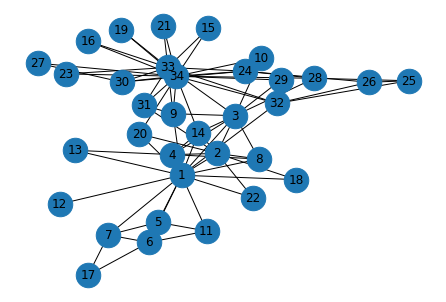

In [65]:
# 连边对数据可以直接读取来生成网络
G = nx.read_edgelist("karate.txt",delimiter=",")
G = G.to_undirected()  
pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,node_size=600)

### 4.7.1 度中心性 (Degree Centrality)
节点度就是所有和它直接相连的节点数量，是研究网络拓扑结构的最基本参数。节点的度值体现了该节点和周围节点之间建立直接联系的能力，因此节点的度值中心性大小体现了节点的活跃特性，中心性较高的节点具有较多的连接关系。设网络中有个节点，则节点的度指标计算公式为
 ![](图片4.png)
其中，![Alt text](图片5.png)表示节点直接相连的节点数，也就是该节点的度值。

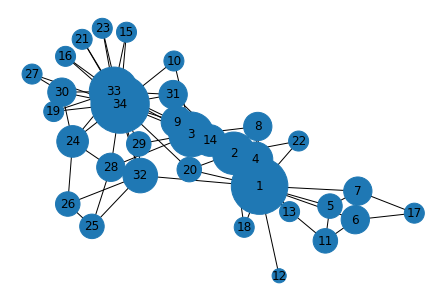

In [66]:
#求节点的度
degree_G=G.degree()
#nx.degree(G)
#取出键值
degree_values=dict(degree_G).values()
#取键形成新的列表
degree_keys=dict(degree_G).keys()

pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,nodelist=degree_keys,node_size=[x*200 for x in degree_values])

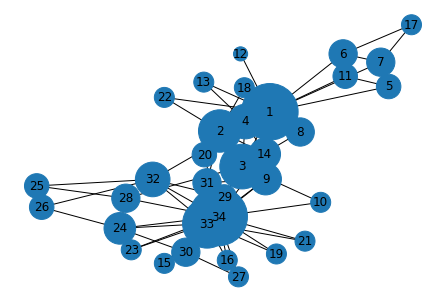

In [67]:
# a new code for Networkx2.2
d = dict(G.degree)
pos=nx.spring_layout(G)
nx.draw(G, with_labels=True,nodelist=d.keys(), node_size=[v * 200 for v in d.values()])
plt.show()

In [68]:
G = nx.read_gml('karate.gml' , label='id')
print(dict(nx.degree(G)).values())

dict_values([16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17])


### 4.7.2 紧密度中心性 (Closeness Centrality)
节点中心性的第二种观点是建立在紧密度概念的基础上，度量方法强调在所有节点的集合中，某一个节点与所有其他节点之间的接近程度。从接近程度的角度看，占据中心的节点在与其他节点之间交流信息时比较有效率。紧密度中心性刻画网络中节点到达网络中其它节点的难易程度, 其值定义为该节点到达所有其它节点的最短距离之和的倒数。设网络中有个节点，则节点的紧密度中心性计算公式为
![](图片2.png)
其中，![](图片6.png)是节点和之间的最短路径。度中心性指标反映了一个节点对于网络中其他节点的直接影响力，而紧密度中心性指标则反映的是节点通过网络对其他节点施加影响的能力，因而紧密度指标相对于度指标更加能反映网络全局的结构。

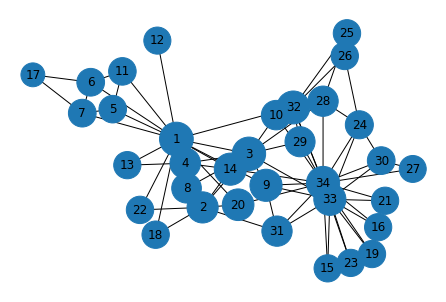

In [69]:
closeness_G=nx.closeness_centrality(G)
#取出键值
closeness_values=closeness_G.values()
#取键形成新的列表
closeness_keys=closeness_G.keys()

pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,nodelist=closeness_keys,node_size=[x*2000 for x in closeness_values])

###  4.7.3 介数中心性 (Betweenness Centrality)
介数中心性是建立在以下假设的基础上，即一个节点如果能够控制传播通道的话，则它在网络中应该获得更大的权利、具有较高的重要性。两个不相邻节点之间的相互作用依赖于网络中的其他节点，特别是那些在这两个节点之间提供连接路径的节点，因此可认为重要节点在某种程度上控制着很多不相邻节点之间的相互作用，这就是介数中心性的物理意义。介数指标刻画了网络中节点对于信息流动的影响力，在网络中使用最短路径路由算法，介数中心性指标刻画了信息流经给定节点的可能性，节点的介数中心性均会随着经过该节点的信息流的增大而增大，因此利用介数指标可以确定信息负载繁重的网络节点。网络中节点的介数中心性计算公式为
   ![](图片1.png)
其中，![](图片7.png)表示节点和之间经过节点的最短路径数。![](图片8.png)表示节点和之间的最短路径数。介数中心性除了能衡量节点的重要性外，它的另一个重要作用是能够分辨出跨界者，即那些在两个或多个社团结构中扮演着不可或缺桥梁作用的个体。

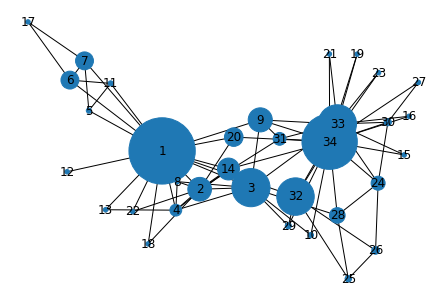

In [70]:
betweenness_G=nx.betweenness_centrality(G)

#取出键值
betweenness_values=betweenness_G.values()
#取键形成新的列表
betweenness_keys=betweenness_G.keys()

pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,nodelist=betweenness_keys,node_size=[x*10000+20 for x in betweenness_values])

###  4.7.4 eigenvector_centrality

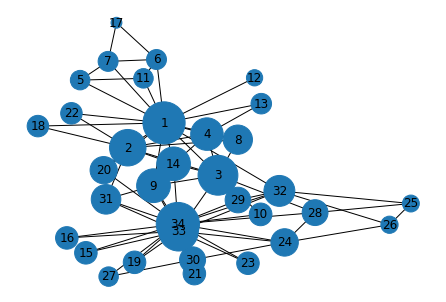

In [71]:
eigenvector_G=nx.eigenvector_centrality_numpy(G)

#取出键值
eigenvector_values=eigenvector_G.values()
#取键形成新的列表
eigenvector_keys=eigenvector_G.keys()

pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,nodelist=eigenvector_keys,node_size=[x*5000 for x in eigenvector_values])

###  4.7.5 katz_centrality

/Users/liding/anaconda/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


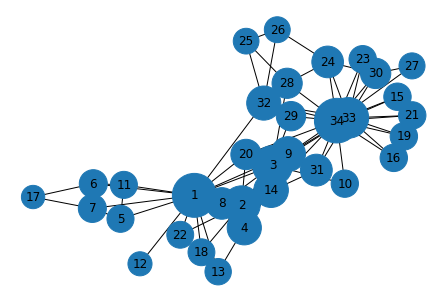

In [72]:
katz_G=nx.katz_centrality_numpy(G)

#取出键值
katz_values=katz_G.values()
#取键形成新的列表
katz_keys=katz_G.keys()

pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,nodelist=katz_keys,node_size=[x*6000 for x in katz_values])

###  4.7.6 communicability_centrality

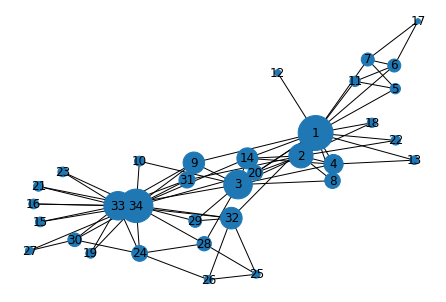

In [73]:
communicability_G=nx.communicability_betweenness_centrality(G)

#取出键值
communicability_values=communicability_G.values()
#取键形成新的列表
communicability_keys=communicability_G.keys()

pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,nodelist=communicability_keys,node_size=[x*2000+10 for x in communicability_values])

###  4.7.7 load_centrality

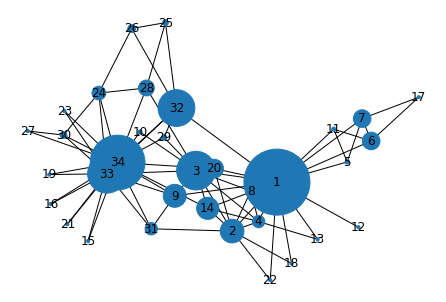

In [74]:
load_centrality_G=nx.load_centrality(G)

#取出键值
load_centrality_values=load_centrality_G.values()
#取键形成新的列表
load_centrality_keys=load_centrality_G.keys()

pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,nodelist=load_centrality_keys,node_size=[x*10000+10 for x in load_centrality_values])

###  4.7.8 边的中心性（edge_betweenness_centrality）

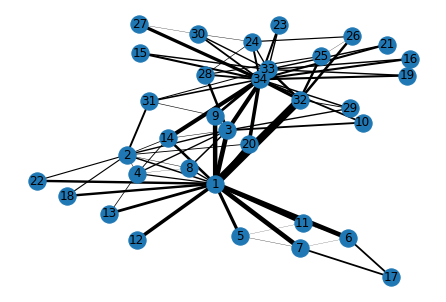

In [75]:
edge_betweenness=nx.edge_betweenness_centrality(G)

#取出键值
edge_betweenness_values=edge_betweenness.values()
#取键形成新的列表
edge_betweenness_keys=edge_betweenness.keys()

pos=nx.spring_layout(G)
#nx.draw(G,pos,with_labels=True,nodelist=load_centrality_keys,node_size=[x*10000+10 for x in load_centrality_values])
nx.draw(G,pos,with_labels=True,edgelist=edge_betweenness_keys,width=[x*60 for x in edge_betweenness_values])

## 4.8 网络中的平均最短路径长度



### 4.8.1 取出网络中的连通成分

True
[34]
True


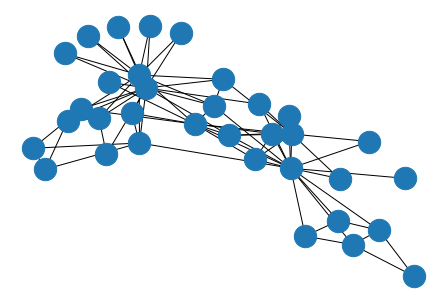

In [76]:
#G=nx.read_edgelist('edge.txt')
#如果该网络是连通的则返回True，否则返回Flase
print(nx.is_connected(G)) 
#打印连通成分的列表
print([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)])
#选择最大的连通成分
Gc = max(nx.connected_component_subgraphs(G), key=len) 
print(nx.is_connected(Gc))
pos=nx.spring_layout(Gc)
#绘制图表
nx.draw(Gc,pos,with_labels=False,node_size=500)


### 4.8.2 网络的直径

nx.diameter(G)返回图G的直径（最长最短路径的长度），

### 4.8.3 节点间平均最短路径长度

而nx.average_shortest_path_length(G)则返回图G所有节点间平均最短路径长度。

# 5 社交网络的社团划分算法

## 5.1 创建环境与网络数据的读入

In [77]:
#由于networkx中没有常用的社团划分算法，所以这里面我们使用igraph包中的社团划分算法来分析网络社团结构，但是画图还是用networkx中的画图功能
import igraph as ig                                         #导入igraph网络分析模块

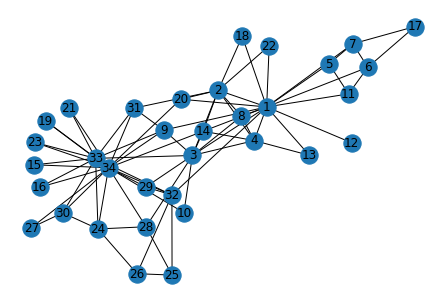

In [78]:
# 连边对数据可以直接读取来生成网络
Gn_karate = nx.read_gml("karate.gml")
Gn_karate = Gn_karate.to_undirected()  

#对生成的网络数据进行可视化
pos=nx.spring_layout(Gn_karate)
nx.draw(Gn_karate,pos,with_labels=True)

In [79]:
#获取网络数据中的边列表，并根据其使用igraph创建网络
Gi_karate_d=ig.Graph.Read_Edgelist("karate2.txt")  #  
#Gi_karate_d=ig.Graph.Read_GML("karate.gml")              #基于这些连边使用igraph创建一个新网络
Gi_karate_d.write_edgelist("karate.txt")
Gi_karate=Gi_karate_d.as_undirected()
print (Gi_karate)

IGRAPH U--- 34 78 --
+ edges:
 0 --  1  2  3  4  5  6  7  8 10 11 12 13 17 19 21 31      25 -- 23 24 31
 1 --  0  2  3  7 13 17 19 21 30                           26 -- 29 33
 2 --  0  1  3  7  8  9 13 27 28 32                        27 --  2 23 24 33
 3 --  0  1  2  7 12 13                                    28 --  2 31 33
 4 --  0  6 10                                             29 -- 23 26 32 33
 5 --  0  6 10 16                                          30 --  1  8 32 33
 6 --  0  4  5 16                                          31 --  0 24 25 28
32 33
 7 --  0  1  2  3                                          32 --  2  8 14 15
18 20 22 23 29 30 31 33
 8 --  0  2 30 32 33                                       33 --  8  9 13 14
15 18 19 20 22 23 26 27 28 29 30 31 32
 9 --  2 33
10 --  0  4  5
11 --  0
12 --  0  3
13 --  0  1  2  3 33
14 -- 32 33
15 -- 32 33
16 --  5  6
17 --  0  1
18 -- 32 33
19 --  0  1 33
20 -- 32 33
21 --  0  1
22 -- 32 33
23 -- 25 27 29 32 33
24 -- 25 27 31


In [80]:
pos=nx.spring_layout(Gn_karate)
print(pos)

{'1': array([-0.36163792,  0.06455277]), '2': array([-0.22968105, -0.09009183]), '3': array([0.02184224, 0.00324929]), '4': array([-0.24915737,  0.09003552]), '5': array([-0.7018167,  0.1009982]), '6': array([-0.73895352,  0.30980659]), '7': array([-0.7917548 ,  0.20520037]), '8': array([-0.20393559,  0.16276981]), '9': array([ 0.05926891, -0.10059058]), '10': array([ 0.15117919, -0.32132252]), '11': array([-0.62874398,  0.23846298]), '12': array([-0.7080178 , -0.11030301]), '13': array([-0.40357316,  0.31240236]), '14': array([-0.09444074, -0.09000246]), '15': array([0.620897  , 0.00193496]), '16': array([ 0.65272854, -0.22842938]), '17': array([-1.        ,  0.36602455]), '18': array([-0.44317672, -0.23392546]), '19': array([ 0.40151305, -0.39248327]), '20': array([-0.0682101 ,  0.01384595]), '21': array([ 0.66343854, -0.10237923]), '22': array([-0.50238182, -0.12898346]), '23': array([ 0.52453315, -0.32061488]), '24': array([0.50560825, 0.08769994]), '25': array([0.33825854, 0.43082

## 5.2 基于K派系进行社团检测

In [81]:
from networkx.algorithms.community import k_clique_communities
community_list=list(k_clique_communities(Gn_karate, 3))   # k=3
print(community_list)

[frozenset({'5', '17', '6', '1', '11', '7'}), frozenset({'25', '26', '32'}), frozenset({'22', '24', '14', '9', '3', '15', '8', '31', '20', '33', '16', '34', '32', '19', '30', '13', '21', '23', '29', '4', '1', '18', '2', '27', '28'})]


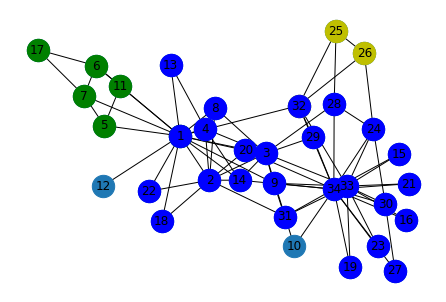

In [82]:
#用三个不同颜色表示出三个不同的社团
nx.draw(Gn_karate,pos,with_labels=True, node_size = 500)

nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list[0], node_size=500, node_color='g', with_labels=True)
nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list[1], node_size=500, node_color='y', with_labels=True)
nx.draw_networkx_nodes(Gn_karate, pos,nodelist= community_list[2], node_size=500, node_color='b', with_labels=True)        

In [83]:
print(len(community_list))
print(len(Gn_karate))
membership=[]        #新建一个空列表，membership初始化
for i in range(0,len(Gn_karate)):
    membership.append(0)

3
34


In [84]:
#计算社团划分对应模块度
membership=[]        #新建一个空列表，membership初始化
for i in range(0,len(Gn_karate)):
    membership.append(0)

# 根据社团划分对membership赋值
for i in range(0,len(community_list)-1):
    nodes=map(int, community_list[i])
    for j in nodes:
        membership[j]=i
print (membership) 
                
#根据membership计算模块度
Q_modularity=ig.GraphBase.modularity(Gi_karate, membership)
print (Q_modularity )

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]
-0.023750821827745017


## 5.3 基于fastgreedy算法的社团检测

In [85]:
#对g1进行社团划分，并显示结果
h1=Gi_karate.community_fastgreedy(weights=None)   # fastgreedy算法社团检测
print (h1)

Dendrogram, 34 elements, 33 merges

18 22 15 8 30 32 24 25 31 28 26 29 33 23 27 14 20 7 3 12 9 2 13 1 17 21 19 16 5 6 0 4 10 11
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |  |  | | | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |  `--' | | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |   |   | | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |   `---' | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |     |   | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |     `---' | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |       |   | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |       `---' |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |         |   |  |
|  |  |  | |  |  |  |  |  |  `--'  |  |  |  |  |  | |

In [86]:
community_list1=list(h1.as_clustering())     # 对系统树图进行切割
print (community_list1)

community_list=[]
for item in community_list1:
    community_list.append([j+1 for j in item])
print (community_list)    

[[0, 4, 5, 6, 10, 11, 16, 19], [1, 2, 3, 7, 9, 12, 13, 17, 21], [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]
[[1, 5, 6, 7, 11, 12, 17, 20], [2, 3, 4, 8, 10, 13, 14, 18, 22], [9, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]


In [87]:
list(map(str,[66,53,0,94]))

['66', '53', '0', '94']

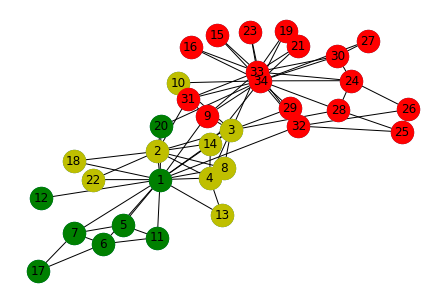

In [88]:
pos=nx.spring_layout(Gn_karate)
nx.draw(Gn_karate,pos,with_labels=True, node_size = 500)

#必须将networkx中的节点编号转换成字符才能和igraph里面的节点对应上
community_list_s=community_list
for i in range(0,len(community_list)):                 
    community_list_s[i]=list(map(str, community_list[i]))

#将不同社团中的节点绘制成不同的颜色  
nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[0],node_size=500, node_color='g', with_labels=True)
nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[1], node_size=500, node_color='y', with_labels=True)
nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[2], node_size=500, node_color='r', with_labels=True) 

In [89]:
#计算社团划分对应模块度
membership=[]        #新建一个空列表，membership初始化
for i in range(0,len(Gn_karate)):
    membership.append(0)

# 根据社团划分对membership赋值
for i in range(0,len(community_list1)):
    nodes=map(int, community_list1[i])
    for j in nodes:
        membership[j]=i
print (membership) 

#根据membership计算模块度
Q_modularity=ig.GraphBase.modularity(Gi_karate, membership)
print (Q_modularity )



[0, 1, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
0.38067061143984215


$$NMI\left( {X;Y} \right){\rm{ = }}\frac{{I\left( {X;Y} \right)}}{{\sqrt {H\left( X \right)H\left( Y \right)} }}$$

## 5.3 基于GN算法算法的社团检测

In [90]:
h1=Gi_karate.community_edge_betweenness(clusters=None, directed=False, weights=None)   # GN算法社团检测
print (h1)

Dendrogram, 34 elements, 33 merges

2 28 27 24 25 31 26 14 15 18 20 22 8 30 23 29 32 33 9 0 1 3 13 7 21 19 17 12 11 5 6 16 4 10
| |  |  |  |  |  |  |  |  |  |  |  | |  |  |  |  |  | | | | |  | |  |  |  |  |  | | |  | |
| |  |  |  |  |  |  |  |  |  |  |  | |  |  |  `--'  | | | | |  | |  |  |  |  |  | | |  | |
| |  |  |  |  |  |  |  |  |  |  |  | |  |  |   |    | | | | |  | |  |  |  |  |  | | |  | |
| |  |  |  `--'  |  |  |  |  |  |  | |  |  `---'    | | | | |  | |  |  |  |  |  | | |  | |
| |  |  |   |    |  |  |  |  |  |  | |  |    |      | | | | |  | |  |  |  |  |  | | |  | |
`-'  |  `---'    |  |  |  |  |  |  | |  `----'      | | | `-'  | |  |  |  |  |  | `-'  `-'
 |   |    |      |  |  |  |  |  |  | |    |         | | |  |   | |  |  |  |  |  |  |    | 
 |   |    |      |  |  |  |  |  |  | |    |         | | `--'   | |  |  |  |  |  `--'    | 
 |   |    |      |  |  |  |  |  |  | |    |         | |  |     | |  |  |  |  |   |      | 
 |   |    |      |  |  |  |  |  |  | |    |         |

In [91]:
community_list1=list(h1.as_clustering())   # 对系统树图进行切割，按照Q值最大的标准
print (community_list1)
community_list=[]
for item in community_list1:
    community_list.append([j+1 for j in item])
print (community_list)    

[[0, 1, 3, 7, 11, 12, 13, 17, 19, 21], [2, 24, 25, 27, 28, 31], [4, 5, 6, 10, 16], [8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33], [9]]
[[1, 2, 4, 8, 12, 13, 14, 18, 20, 22], [3, 25, 26, 28, 29, 32], [5, 6, 7, 11, 17], [9, 15, 16, 19, 21, 23, 24, 27, 30, 31, 33, 34], [10]]


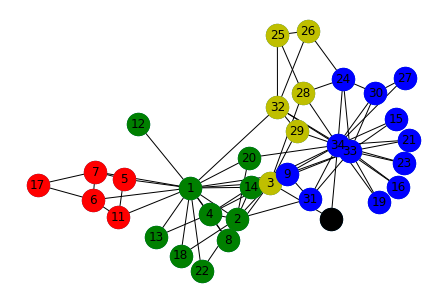

In [92]:
pos=nx.spring_layout(Gn_karate)
nx.draw(Gn_karate,pos,with_labels=True, node_size = 500)

#必须将networkx中的节点编号转换成字符才能和igraph里面的节点对应上
community_list_s=community_list
for i in range(0,len(community_list)):                 
    community_list_s[i]=list(map(str, community_list[i]))

#将不同社团中的节点绘制成不同的颜色  
nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[0],node_size=500, node_color='g', with_labels=True)
nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[1], node_size=500, node_color='y', with_labels=True)
nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[2], node_size=500, node_color='r', with_labels=True) 
nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[3], node_size=500, node_color='b', with_labels=True)
nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[4], node_size=500, node_color='k', with_labels=True) 

In [93]:
#必须将networkx中的节点编号转换成字符才能和igraph里面的节点对应上
community_list_s=community_list
for i in range(0,len(community_list)):                 
    community_list_s[i]=list(map(str, community_list[i]))
    print(community_list_s[i])

['1', '2', '4', '8', '12', '13', '14', '18', '20', '22']
['3', '25', '26', '28', '29', '32']
['5', '6', '7', '11', '17']
['9', '15', '16', '19', '21', '23', '24', '27', '30', '31', '33', '34']
['10']


In [94]:
#计算社团划分对应模块度
membership=[]        #新建一个空列表，membership初始化
for i in range(0,len(Gn_karate)):
    membership.append(0)

# 根据社团划分对membership赋值
for i in range(0,len(community_list1)):
    nodes=map(int, community_list1[i])
    for j in nodes:
        membership[j]=i
print (membership )

#根据membership计算模块度
Q_modularity=ig.GraphBase.modularity(Gi_karate, membership)
print( Q_modularity )

[0, 0, 1, 0, 2, 2, 2, 0, 3, 4, 2, 0, 0, 0, 3, 3, 2, 0, 3, 0, 3, 0, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3]
0.40129848783694944


## 5.4 基于标签传播算法的社团检测

In [95]:
community_list1=Gi_karate.community_label_propagation(weights=None, initial=None, fixed=None)  # GN算法社团检测
print ('the modularity of this network is', community_list1.modularity)    

the modularity of this network is 0.39907955292570685


In [96]:
community_list=[]
for item in community_list1:
    community_list.append([j+1 for j in item])
    
print (community_list)

[[1, 2, 3, 4, 8, 12, 13, 14, 18, 20, 22], [5, 6, 7, 11, 17], [9, 10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]


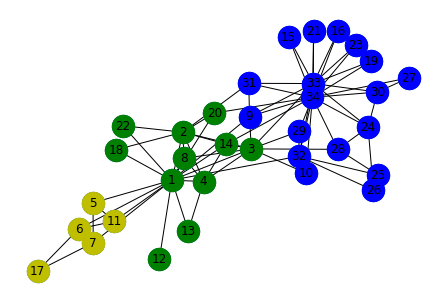

In [97]:
pos=nx.spring_layout(Gn_karate)
nx.draw(Gn_karate,pos,with_labels=True, node_size = 500)

#必须将networkx中的节点编号转换成字符才能和igraph里面的节点对应上
community_list_s=community_list
for i in range(0,len(community_list)):                 
    community_list_s[i]=list(map(str, community_list[i]))

#将不同社团中的节点绘制成不同的颜色
for i in range(0,len(community_list_s)):
    if i%5 == 0:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[0],node_size=500, node_color='g', with_labels=True)
    elif i%5 == 1:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[1], node_size=500, node_color='y', with_labels=True)
    elif i%5 == 2:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[2], node_size=500, node_color='b', with_labels=True) 
    elif i%5 == 3:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[3], node_size=500, node_color='r', with_labels=True) 
    elif i%5 == 4:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[4], node_size=500, node_color='m', with_labels=True) 


## 5.5 基于community_leading_eigenvector算法的社团检测

In [98]:
community_list1=Gi_karate.community_leading_eigenvector(clusters=None)
print ('the modularity of this network is', community_list1.modularity )

the modularity of this network is 0.3934089414858645


In [99]:
community_list=[]
for item in community_list1:
    community_list.append([j+1 for j in item])
    
print (community_list)

[[1, 5, 6, 7, 11, 12, 17], [9, 10, 15, 16, 19, 21, 23, 27, 30, 31, 33, 34], [2, 3, 4, 8, 13, 14, 18, 20, 22], [24, 25, 26, 28, 29, 32]]


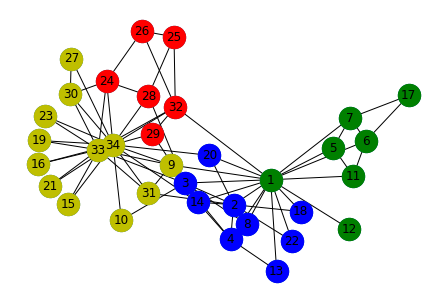

In [100]:
pos=nx.spring_layout(Gn_karate)
#print(pos) # 1-34
nx.draw(Gn_karate,pos,with_labels=True, node_size = 500)

#必须将networkx中的节点编号转换成字符才能和igraph里面的节点对应上
community_list_s=community_list
for i in range(0,len(community_list)):                 
    community_list_s[i]=list(map(str, community_list[i]))
#print(community_list_s)  # 0-33

#将不同社团中的节点绘制成不同的颜色
for i in range(0,len(community_list_s)):
    if i%5 == 0:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[0],node_size=500, node_color='g', with_labels=True)
    elif i%5 == 1:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[1], node_size=500, node_color='y', with_labels=True)
    elif i%5 == 2:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[2], node_size=500, node_color='b', with_labels=True) 
    elif i%5 == 3:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[3], node_size=500, node_color='r', with_labels=True) 
    elif i%5 == 4:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[4], node_size=500, node_color='m', with_labels=True) 
        

## 5.5 基于community_multilevel算法的社团检测

In [101]:
community_list1=Gi_karate.community_multilevel(weights=None, return_levels=True)


In [102]:
community_list=[]
for item in community_list1:
    community_list.append(item)
    
print (community_list)

[<igraph.clustering.VertexClustering object at 0xa234fbd30>, <igraph.clustering.VertexClustering object at 0xa234fbc88>]


In [103]:
Gi_karate.community_multilevel(weights=None, return_levels=True)

## 5.6 基于community_optimal_modularity算法的社团检测

In [104]:
community_list1=Gi_karate.community_optimal_modularity(weights=None)
print ('the modularity of this network is', community_list1.modularity )

the modularity of this network is 0.4197896120973046


In [105]:
community_list=[]
for item in community_list1:
    community_list.append([j+1 for j in item])
    
print( community_list)

[[1, 2, 3, 4, 8, 12, 13, 14, 18, 20, 22], [5, 6, 7, 11, 17], [9, 10, 15, 16, 19, 21, 23, 27, 30, 31, 33, 34], [24, 25, 26, 28, 29, 32]]


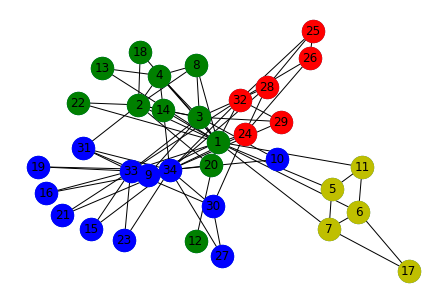

In [106]:
pos=nx.spring_layout(Gn_karate)
nx.draw(Gn_karate,pos,with_labels=True, node_size = 500)

#必须将networkx中的节点编号转换成字符才能和igraph里面的节点对应上
community_list_s=community_list
for i in range(0,len(community_list)):                 
    community_list_s[i]=list(map(str, community_list[i]))

#将不同社团中的节点绘制成不同的颜色
for i in range(0,len(community_list_s)):
    if i%5 == 0:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[0],node_size=500, node_color='g', with_labels=True)
    elif i%5 == 1:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[1], node_size=500, node_color='y', with_labels=True)
    elif i%5 == 2:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[2], node_size=500, node_color='b', with_labels=True) 
    elif i%5 == 3:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[3], node_size=500, node_color='r', with_labels=True) 
    elif i%5 == 4:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[4], node_size=500, node_color='m', with_labels=True) 
  

## 5.7 基于community_walktrap算法的社团检测

In [107]:
h1=Gi_karate.community_walktrap(weights=None, steps=1000)
print (h1)

Dendrogram, 34 elements, 33 merges

21 0 6 11 12 3 17 1 13 19 16 7 10 4 5 32 29 2 30 25 24 27 33 8 20 28 26 31 14 15 18 22 9 23
|  | | |  |  | |  | |  |  |  | |  | | |  |  | |  |  |  |  |  | |  |  |  |  |  |  |  |  | |
`--' | |  |  | |  | |  |  |  | |  | | `--'  | |  |  |  |  `--' |  |  |  |  |  |  |  |  | |
 |   | |  |  | |  | |  |  |  | |  | |  |    | |  |  |  |   |   |  |  |  |  |  |  |  |  | |
 `---' |  |  | |  | |  |  |  | |  | |  |    | |  `--'  |   `---'  |  |  |  |  |  |  |  | |
   |   |  |  | |  | |  |  |  | |  | |  |    | |   |    |     |    |  |  |  |  |  |  |  | |
   |   |  `--' `--' |  |  |  | |  | |  `----' |   `----'     |    |  |  |  |  |  |  |  | |
   |   |   |    |   |  |  |  | |  | |    |    |     |        |    |  |  |  |  |  |  |  | |
   `---'   `----'   |  |  |  | |  | |    |    |     |        |    |  |  |  |  |  |  |  | |
     |       |      |  |  |  | |  | |    |    |     |        |    |  |  |  |  |  |  |  | |
     `-------'      |  |  |  | |  | |    `----'     `

In [108]:
community_list1=list(h1.as_clustering())   # 对系统树图进行切割，按照Q值最大的标准
print( community_list1)
community_list=[]
for item in community_list1:
    community_list.append([j+1 for j in item])
print( community_list)    

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]
[[1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22], [3, 9, 10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]


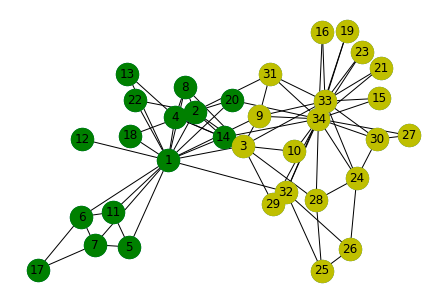

In [109]:
pos=nx.spring_layout(Gn_karate)
nx.draw(Gn_karate,pos,with_labels=True, node_size = 500)

#必须将networkx中的节点编号转换成字符才能和igraph里面的节点对应上
community_list_s=community_list
for i in range(0,len(community_list)):                 
    community_list_s[i]=list(map(str, community_list[i]))

#将不同社团中的节点绘制成不同的颜色
for i in range(0,len(community_list_s)):
    if i%5 == 0:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[0],node_size=500, node_color='g', with_labels=True)
    elif i%5 == 1:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[1], node_size=500, node_color='y', with_labels=True)
    elif i%5 == 2:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[2], node_size=500, node_color='b', with_labels=True) 
    elif i%5 == 3:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[3], node_size=500, node_color='r', with_labels=True) 
    elif i%5 == 4:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[4], node_size=500, node_color='m', with_labels=True) 
  

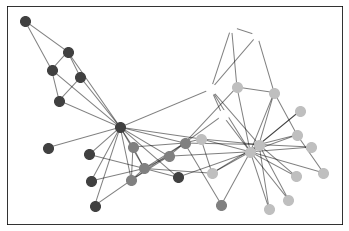

In [110]:
from community import community_louvain
import networkx as nx
import matplotlib.pyplot as plt

#better with karate_graph() as defined in networkx example.
#erdos renyi don't have true community structure
#G = nx.erdos_renyi_graph(30, 0.05)
G = nx.karate_club_graph()
#first compute the best partition
partition = community_louvain.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 100,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

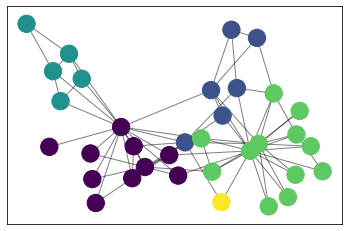

In [111]:
nx.draw_networkx_edges(G,pos, alpha=0.5)
nx.draw_networkx_nodes(G,pos, node_color=membership,node_size = 300)
plt.show()

## 5.8 基于community_spinglass算法的社团检测

In [112]:
community_list1=Gi_karate.community_spinglass(weights=None,spins=25,parupdate=False,start_temp=1,stop_temp=0.01,cool_fact=0.99,update_rule="config",gamma=1,implementation="orig")
print( 'the modularity of this network is', community_list1.modularity )

the modularity of this network is 0.41584483892176205


In [113]:
community_list=[]
for item in community_list1:
    community_list.append([j+1 for j in item])
print( community_list) 

[[10], [5, 6, 7, 11, 17], [9, 15, 16, 19, 21, 23, 27, 30, 31, 33, 34], [24, 25, 26, 28, 29, 32], [1, 2, 3, 4, 8, 12, 13, 14, 18, 20, 22]]


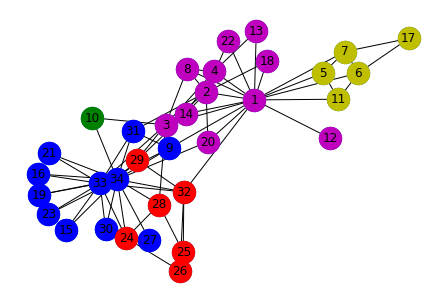

In [114]:
pos=nx.spring_layout(Gn_karate)
nx.draw(Gn_karate,pos,with_labels=True, node_size = 500)

#必须将networkx中的节点编号转换成字符才能和igraph里面的节点对应上
community_list_s=community_list
for i in range(0,len(community_list)):                 
    community_list_s[i]=list(map(str, community_list[i]))
#print(len(community_list_s))
#将不同社团中的节点绘制成不同的颜色
for i in range(0,len(community_list_s)):
    if i%5 == 0:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[0],node_size=500, node_color='g', with_labels=True)
    elif i%5 == 1:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[1], node_size=500, node_color='y', with_labels=True)
    elif i%5 == 2:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[2], node_size=500, node_color='b', with_labels=True) 
    elif i%5 == 3:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[3], node_size=500, node_color='r', with_labels=True) 
    elif i%5 == 4:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[4], node_size=500, node_color='m', with_labels=True) 
  

[4, 4, 4, 4, 1, 1, 1, 4, 2, 0, 1, 4, 4, 4, 2, 2, 1, 4, 2, 4, 2, 4, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2]


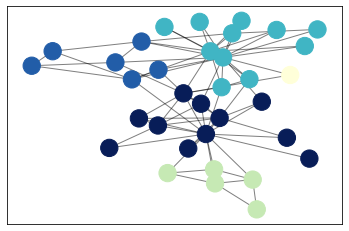

In [115]:
pos=nx.spring_layout(Gn_karate)
#nx.draw(Gn_karate,pos,with_labels=True, node_size = 500)
#计算社团划分对应模块度
membership=[]        #新建一个空列表，membership初始化
for i in range(0,len(Gn_karate)):
    membership.append(0)

# 根据社团划分对membership赋值
for i in range(0,len(community_list1)):
    nodes=map(int, community_list1[i])
    for j in nodes:
        membership[j]=i
        
print( membership) 
nx.draw_networkx_edges(Gn_karate,pos, alpha=0.5)
nx.draw_networkx_nodes(Gn_karate,pos, cmap=("YlGnBu"),node_color=membership,node_size = 300,with_labels=True)
plt.show()

## 5.9 基于community_infomap算法的社团检测

In [116]:
community_list1=Gi_karate.community_infomap()
print ('the modularity of this network is', community_list1.modularity )

the modularity of this network is 0.4020381328073636


In [117]:
community_list=[]
for item in community_list1:
    community_list.append([j+1 for j in item])
print (community_list)

[[9, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], [1, 2, 3, 4, 8, 10, 12, 13, 14, 18, 20, 22], [5, 6, 7, 11, 17]]


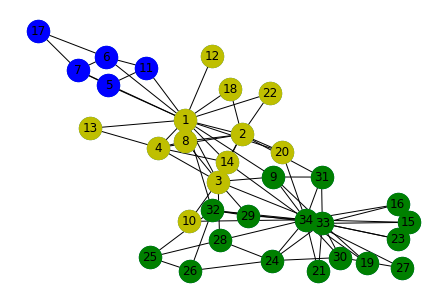

In [118]:
pos=nx.spring_layout(Gn_karate)

nx.draw(Gn_karate,pos,with_labels=True, node_size = 500)

#必须将networkx中的节点编号转换成字符才能和igraph里面的节点对应上
community_list_s=community_list
for i in range(0,len(community_list)):                 
    community_list_s[i]=list(map(str, community_list[i]))

#将不同社团中的节点绘制成不同的颜色
for i in range(0,len(community_list_s)):
    if i%5 == 0:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[0],node_size=500, node_color='g', with_labels=True)
    elif i%5 == 1:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[1], node_size=500, node_color='y', with_labels=True)
    elif i%5 == 2:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[2], node_size=500, node_color='b', with_labels=True) 
    elif i%5 == 3:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[3], node_size=500, node_color='r', with_labels=True) 
    elif i%5 == 4:
        nx.draw_networkx_nodes(Gn_karate,pos,nodelist=community_list_s[4], node_size=500, node_color='m', with_labels=True) 
  

## 5.10 比较不同社交检测算法之间的差别

(1) compare_communities(comm1, comm2, method='vi', remove_none=False)
Compares two community structures using various distance measures.   	
(2) split_join_distance(comm1, comm2, remove_none=False)
Calculates the split-join distance between two community structures.

## 5.11 尚未完成的其他部分（许）

snap库中进行社团划分的方法

1)	对训练集中社交圈子数据的分析，主要包括：
（1）	每个人的社交圈子数量
（2）	每个社交圈子的成员数量
（3）	被分圈好友占所有好友的百分比，每个用户好友数量
（4）	被分在多个社交圈子的成员次数占所有成员的百分比
（5）	是否有大圈子中有小圈子的情形（现将圈子分为学校，然后再分出班级来）
（6）	被分圈成员在网络结构上的偏好性（是不是朋友多的被分圈了）
（7）	社交圈子和社交网络结构尤其是社团检测算法的契合程度（定性）


# 6 有向无权网络的统计量分析

## 6.1 有向无权网络中节点的几种度

### 6.1.1 有向网络中节点的入度

/Users/liding/anaconda/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


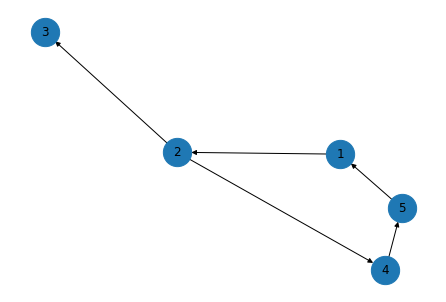

In [119]:
G = nx.DiGraph()                                           #生成一个有向网络
G.add_nodes_from([1,2,3,4,5])                              #加点集合
G.add_edges_from([(1,2),(2,3),(2,4),(4,5),(5,1)])          #加边集合：边(node1,node2)为一条由node1指向node2的单向有向边
nx.draw(G,with_labels=True, node_size = 800)

In [120]:
# 获得有向网络中所有节点的入度值
G.in_degree()

InDegreeView({1: 1, 2: 1, 3: 1, 4: 1, 5: 1})

# 7 加权网络的统计量分析

## 7.x  加权网络中的最短路径

### 7.x.1 无向加权网络中的最短路径

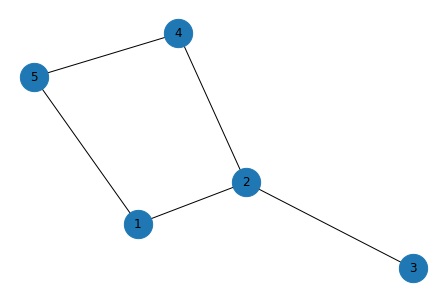

In [121]:
G = nx.Graph()                                                        #建立一个空的无向图G
G.add_nodes_from([1,2,3,4,5])                                         #加点集合
G.add_weighted_edges_from([(1,2,3),(1,5,1),(2,3,1),(2,4,2),(4,5,1)])  #加边集合，有权边
nx.draw(G,with_labels=True, node_size = 800)

In [122]:
#节点4和节点5之间的最短路径
nx.shortest_path(G,source=3,target=5,weight='weight') 

[3, 2, 4, 5]

In [123]:
#节点3和节点5之间的最短路径长度
nx.shortest_path_length(G,source=3,target=5 ,weight='weight')  

4

In [124]:
#网络G中所有节点对之间的最短路径
nx.shortest_path(G,weight='weight')  

{1: {1: [1], 2: [1, 2], 5: [1, 5], 4: [1, 5, 4], 3: [1, 2, 3]},
 2: {2: [2], 1: [2, 1], 3: [2, 3], 4: [2, 4], 5: [2, 4, 5]},
 3: {3: [3], 2: [3, 2], 1: [3, 2, 1], 4: [3, 2, 4], 5: [3, 2, 4, 5]},
 4: {4: [4], 2: [4, 2], 5: [4, 5], 1: [4, 5, 1], 3: [4, 2, 3]},
 5: {5: [5], 1: [5, 1], 4: [5, 4], 2: [5, 4, 2], 3: [5, 4, 2, 3]}}

### 7.x.2 有向加权网络中的最短路径

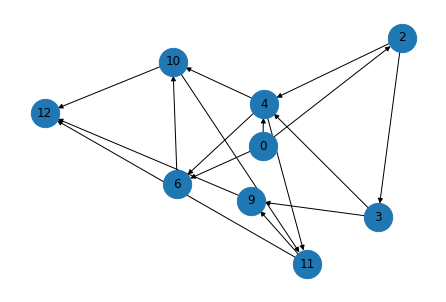

In [125]:
G = nx.DiGraph()                                                        #生成一个有向网络
G.add_nodes_from([0,2,3,4,6,9,10,11,12])                                #加点集合
G.add_weighted_edges_from([(0,2,2),(0,4,6),(0,6,9),(2,3,1),(2,4,3),(3,4,1),(3,9,6),(4,6,2),(4,10,7),(4,11,9),(6,10,4),(9,12,5),(10,11,1),(10,12,5),(11,9,5),(11,12,1)])  #加边集合，有权边                                      #建立一个空的无向图G
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True,node_size = 800)                         #绘制图形

In [126]:
#查看节点0到节点12的最短路径
nx.shortest_path(G,0,12,weight='weight')

[0, 2, 3, 4, 6, 10, 11, 12]

In [127]:
#查看节点0到节点12的Dijkstra路径
nx.dijkstra_path(G,0,12)

[0, 2, 3, 4, 6, 10, 11, 12]

In [128]:
#查看节点0到节点12的最短路径长度
nx.shortest_path_length(G,source=0,target=12,weight='weight')

12

In [129]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
from networkx.algorithms import community
import itertools
G_karate= nx.karate_club_graph()
k = 1
comp = community.girvan_newman(G_karate)

for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities))


([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])


[0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2]


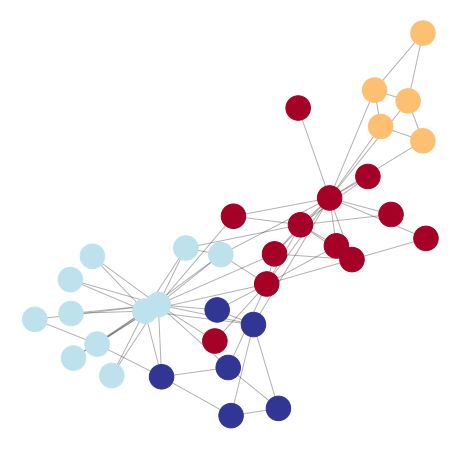

In [130]:
 from community import community_louvain
partition = community_louvain.best_partition(G_karate)
print(list(partition.values()))
pos = nx.spring_layout(G_karate)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(G_karate, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G_karate, pos, alpha=0.3)
plt.show(G_karate)

/Users/liding/anaconda/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


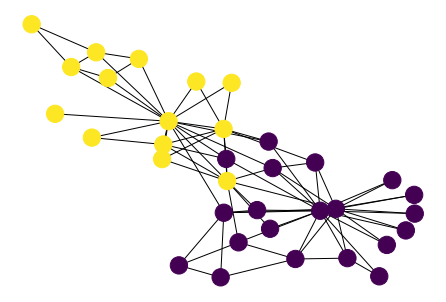

In [131]:
# hierarchical clustering
# 分层聚类

pcc_longueurs=list(nx.all_pairs_shortest_path_length(G_karate))
n=G_karate.number_of_nodes()
distances=np.zeros((n,n)) # distances[i, j] is the length of the shortest path between i and j
for i in range(n):
    for j in range(n):
        distances[i, j] = pcc_longueurs[i][1][j]
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(distances)

nx.draw(G_karate,  node_color = clustering)